<a href="https://colab.research.google.com/github/nickav2004/k-means-cluster-algo/blob/master/ECEN_360_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Implementation

[Jian Tao](https://orcid.org/0000-0003-4228-6089), Texas A&M University

Feb 22, 2024

In [699]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Algorithm
We will strictly follow the steps listed below to implement KMeans algorithm:
1. Select the number of clusters  𝑘  that you think is the optimal number.
2. Initialize  𝑘  points as "centroids" randomly within the space of our data.
3. Attribute each observation to its closest centroid.
4. Update the centroids to the center of all the attributed set of observations.
5. To be implemented - > Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4)

## Frist of All, Load the data
This data set is just for testing purpose.

In [700]:
iris = load_iris()

In [701]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [702]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target # only for plot the first figure.

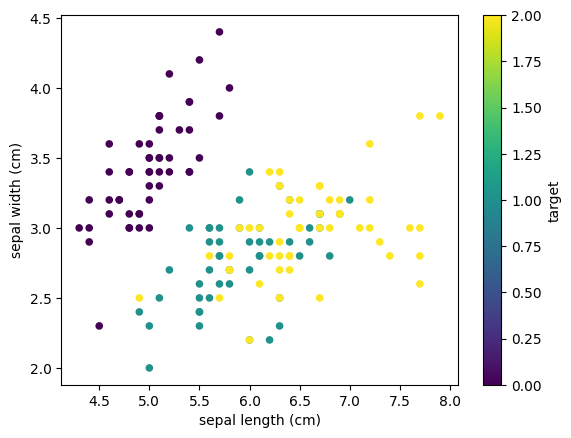

In [703]:
df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)", c="target", colormap='viridis');

## Step 1. Select the number of clusters 𝑘 that you think is the optimal number.

In [704]:
np.random.seed(42) # gets same random numbers
X = df[["sepal length (cm)", "sepal width (cm)"]].to_numpy()

# this random Centroids is just for testing the functions.
Centroids = df[["sepal length (cm)", "sepal width (cm)"]].sample(n=3).to_numpy()
Centroids

array([[6.1, 2.8],
       [5.7, 3.8],
       [7.7, 2.6]])

In [705]:
len(X)

150

## Step 2. Initialize 𝑘 points as "centroids" randomly within the space of our data.

In [706]:
# we will plot the current centroids and the updated centroids for comparison purpose.
def plot_cluster(c, c_n, err=-1):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(x=X[:, 0], y=X[:, 1])
    ax.scatter(x=c[:, 0], y=c[:, 1], s=100, c="y", marker="o", label="Curent Centroids")
    ax.scatter(x=c_n[:, 0], y=c_n[:, 1], s=100, c="r", marker="s", label="Updated Centroids")
    ax.legend()
    ax.set_title("Error: %s"%err)

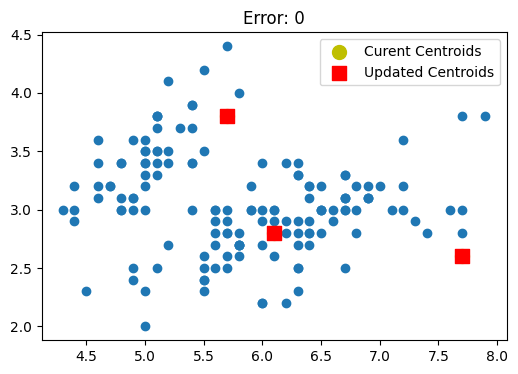

In [707]:
# test the plotting function
plot_cluster(Centroids, Centroids, err=0)

## Step 3. Attribute each observation to its closest centroid.

In [708]:
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [709]:
# X: numpy array - data to be clustered
# e.g.
# X = array([[5.1, 3.5],
#            [4.9, 3. ],
#            [4.7, 3.2]])

# C: numpy array - locations of the current Centroids
# e.g.
# C = array([[6.1, 2.8],
#            [5.7, 3.8],
#            [7.7, 2.6]])

# Return: numpy array - indices to the closest centroids for all X
# e.g.
# Return:
#      array([1., 0., 2.])

def mark_center(X, c):
    num_centers = len(c)
    num_observations = len(X)

    X_c = np.full_like(X[:, 0], -1)

    for i in range(num_observations):
        l = np.argmin([distance(X[i], c[j]) for j in range(num_centers)])
        X_c[i] = l

    if np.any(X_c==-1):
        print ("something goes wrong!")

    return X_c

In [710]:
mark_center (X, Centroids)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 2., 0., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 2., 2.,
       0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 2., 2., 2., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Step 4. Update the centroids to the center of all the attributed set of observations.

In [711]:
# X: numpy array - data to be clustered
# e.g.
# X = array([[5.1, 3.5],
#            [4.9, 3. ],
#            [4.7, 3.2]])

# C: numpy array - locations of the current Centroids
# e.g.
# C = array([[6.1, 2.8],
#            [5.7, 3.8],
#            [7.7, 2.6]])

# X_c: numpy array - indices to the closest centroids for all X
# e.g.
# X_c = array([1., 0., 2.])

# Return: 1. numpy array - updated locations of the centroids
#         2. err - distance between C and C_new

def update_centroids(C, X, X_c, plot=True):
    num_centers = len(C)
    C_new = np.full_like(C, -1)

    for i in range(num_centers):
        C_new[i]= np.mean(X[X_c==i], axis=0)
    err = distance(C, C_new)
    if plot:
        plot_cluster(C, C_new, err=err)
    return C_new, err

## Step 5. Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4)

In [712]:
def My_KMeans(X, n_clusters=3, max_iter=300, tol=1e-05, verbose=True):
    centroids = Centroids
    iter = 0

    while True:
        X_nearest_centroid = mark_center(X,centroids)
        new_centroids, error = update_centroids(centroids, X, X_nearest_centroid, verbose)
        if np.array_equal(centroids, new_centroids) or iter > max_iter:
          break
        centroids = new_centroids
        iter+=1

    print(f"iterations: {iter}")

    return new_centroids

### Set verbose to True to see the plots

In [713]:
Centroids = My_KMeans(X, n_clusters=3, tol=0.01, max_iter=300, verbose=False)
Centroids

iterations: 15


array([[5.8       , 2.7       ],
       [5.00392157, 3.40980392],
       [6.82391304, 3.07826087]])

Finally, check your centers against those from scikit-learn.

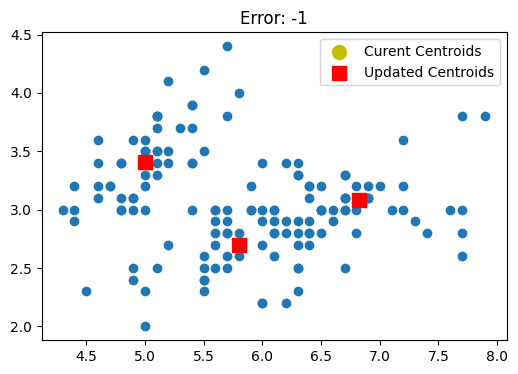

In [714]:
plot_cluster(Centroids, Centroids)

In [715]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, tol=0.00001, max_iter=300)
km.fit(X)
km.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])